In [1]:
import sys
sys.path.append('..')

import pandas as pd

from src.benchmarks.benchmark_factory import BenchmarkFactory

/Users/aszarata/informatyka/magisterka/agh-continual-learning-study/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../dataset/metadata.csv')
df

,img_path,camera_type,pass_no,location,class,role,split
0,train/DataSet_Xtion_RGB_train/000_Corridor1_RG...,Xtion,0,"(0.0, 0.0)",Corridor1,db,train
1,train/DataSet_Xtion_RGB_train/000_Corridor1_RG...,Xtion,0,"(0.0, 0.0)",Corridor1,db,train
2,train/DataSet_Xtion_RGB_train/001_Corridor1_RG...,Xtion,0,"(1.0, 1.0)",Corridor1,db,train
3,train/DataSet_Xtion_RGB_train/001_Corridor1_RG...,Xtion,0,"(1.0, 1.0)",Corridor1,db,train
4,train/DataSet_Xtion_RGB_train/002_Corridor1_RG...,Xtion,0,"(2.0, 2.0)",Corridor1,db,train
...,...,...,...,...,...,...,...
3301,test/DataSet_P40PRO_RGB_test3/078_F107_RGB_000...,P40PRO,3,"(878.0, 878.0)",F107,query,test
3302,test/DataSet_P40PRO_RGB_test3/079_F107_RGB_000...,P40PRO,3,"(879.0, 879.0)",F107,query,test
3303,test/DataSet_P40PRO_RGB_test3/081_F107_RGB_000...,P40PRO,3,"(881.0, 881.0)",F107,query,test
3304,test/DataSet_P40PRO_RGB_test3/082_F107_RGB_000...,P40PRO,3,"(882.0, 882.0)",F107,query,test


In [3]:
class_dict = {
    'Corridor1': 0,
    'Corridor2': 1,
    'Corridor3': 2,
    'D3A': 3,
    'D7': 4,
    'F102': 5,
    'F104': 6,
    'F105': 7,
    'F107': 8
} 

In [4]:
df['location'] = df['location'].apply(lambda s: tuple(map(float, s.strip('()').split(', '))))
df['class_idx'] = df['class'].map(class_dict)

df

,img_path,camera_type,pass_no,location,class,role,split,class_idx
0,train/DataSet_Xtion_RGB_train/000_Corridor1_RG...,Xtion,0,"(0.0, 0.0)",Corridor1,db,train,0
1,train/DataSet_Xtion_RGB_train/000_Corridor1_RG...,Xtion,0,"(0.0, 0.0)",Corridor1,db,train,0
2,train/DataSet_Xtion_RGB_train/001_Corridor1_RG...,Xtion,0,"(1.0, 1.0)",Corridor1,db,train,0
3,train/DataSet_Xtion_RGB_train/001_Corridor1_RG...,Xtion,0,"(1.0, 1.0)",Corridor1,db,train,0
4,train/DataSet_Xtion_RGB_train/002_Corridor1_RG...,Xtion,0,"(2.0, 2.0)",Corridor1,db,train,0
...,...,...,...,...,...,...,...,...
3301,test/DataSet_P40PRO_RGB_test3/078_F107_RGB_000...,P40PRO,3,"(878.0, 878.0)",F107,query,test,8
3302,test/DataSet_P40PRO_RGB_test3/079_F107_RGB_000...,P40PRO,3,"(879.0, 879.0)",F107,query,test,8
3303,test/DataSet_P40PRO_RGB_test3/081_F107_RGB_000...,P40PRO,3,"(881.0, 881.0)",F107,query,test,8
3304,test/DataSet_P40PRO_RGB_test3/082_F107_RGB_000...,P40PRO,3,"(882.0, 882.0)",F107,query,test,8


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_path     3306 non-null   str   
 1   camera_type  3306 non-null   str   
 2   pass_no      3306 non-null   int64 
 3   location     3306 non-null   object
 4   class        3306 non-null   str   
 5   role         3306 non-null   str   
 6   split        3306 non-null   str   
 7   class_idx    3306 non-null   int64 
dtypes: int64(2), object(1), str(5)
memory usage: 206.8+ KB


In [6]:
df_train = df[df["split"] == "train"] 
df_test = df[df["split"] == "test"]

## 1. Camera Domain-Incremental Learning example

In [7]:
camera_tasks_train = [t for _, t in df_train.groupby('camera_type')]
camera_tasks_test = [t for _, t in df_test.groupby('camera_type')]

### 1.1 Place classification example

$C$ - the number of all classes

$D$ - the number of all tasks (domains) - cameras

$\mathcal{X}$ - the set of images

$\mathcal{D} = \{(x_i, c_i, d_i)\}$ - the whole set of observations, where:

$c_i \in \{1...C\}$,

$x_i \in \mathcal{X}$

$d_i \in \{1...D\}$


Then, the task t is defined as:

$\mathcal{D}_t = \{(x_i, c_i)\}$,

$c_i \in \{1...C\}$,

$x_i \in \{x_j | (x_i, c_j, d_j) \in \mathcal{D}: d_j = t \}$

In [8]:
train_paths = [t['img_path'].values for t in camera_tasks_train]
train_labels =  [t['class_idx'].values for t in camera_tasks_train]

test_paths = [t['img_path'].values for t in camera_tasks_test]
test_labels =  [t['class_idx'].values for t in camera_tasks_test]

benchmark_factory = BenchmarkFactory('../dataset', 256)

In [9]:
cls_camera_domain_benchmark = benchmark_factory.build_img_classification_benchmark(
    train_paths=train_paths,
    train_labels=train_labels,
    test_paths=test_paths,
    test_labels=test_labels
)

In [20]:
len(cls_camera_domain_benchmark.test_datasets_stream)

5

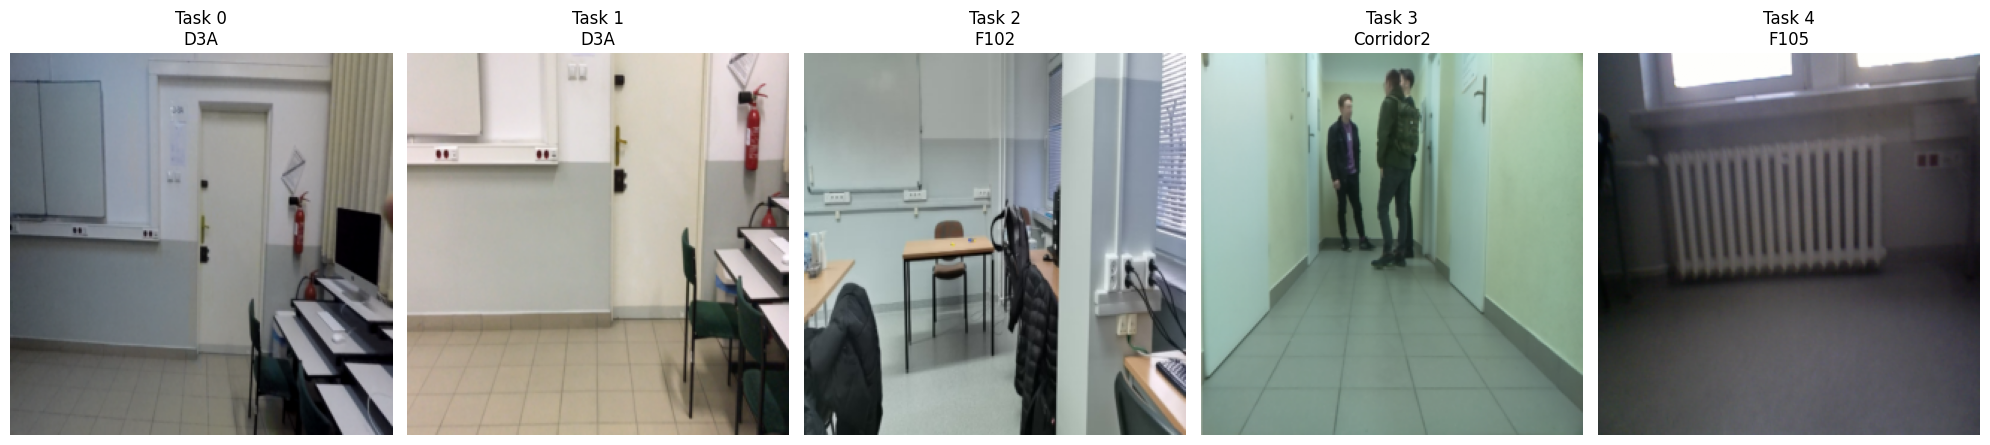

In [21]:
import matplotlib.pyplot as plt
import random

inv_class_dict = {v: k for k, v in class_dict.items()}

n_tasks = len(cls_camera_domain_benchmark.test_datasets_stream)
fig, axes = plt.subplots(1, n_tasks, figsize=(20, 5))

for i, exp in enumerate(cls_camera_domain_benchmark.test_datasets_stream):
    dataset = exp.dataset
    idx = random.randint(0, len(dataset) - 1)
    img, label = dataset[idx][0], dataset[idx][1]
    
    if hasattr(img, 'permute'):
        img = img.permute(1, 2, 0)
        
    axes[i].imshow(img)
    axes[i].set_title(f"Task {i}\n{inv_class_dict[int(label)]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 1.2 Image retrieval example

In [11]:
train_coords = [t['location'].values for t in camera_tasks_train]
test_coords =  [t['location'].values for t in camera_tasks_test]
strategy = "class"

In [12]:
rtv_camera_domain_benchmark = benchmark_factory.build_img_retrieval_benchmark(
    train_paths=train_paths,
    train_labels=train_labels,
    test_paths=test_paths,
    test_labels=test_labels,
    simmilarity_strategy="class"
)

In [13]:
rtv_camera_domain_benchmark.test_datasets_stream[0].dataset[0]

((tensor([[[0.5725, 0.5765, 0.5765,  ..., 0.1765, 0.1765, 0.1765],
           [0.5608, 0.5725, 0.5765,  ..., 0.1765, 0.1765, 0.1765],
           [0.5569, 0.5490, 0.5608,  ..., 0.1765, 0.1922, 0.2157],
           ...,
           [0.5569, 0.5608, 0.5647,  ..., 0.1176, 0.1176, 0.1216],
           [0.5529, 0.5569, 0.5569,  ..., 0.1176, 0.1176, 0.1176],
           [0.5490, 0.5529, 0.5569,  ..., 0.1216, 0.1216, 0.1176]],
  
          [[0.5373, 0.5412, 0.5490,  ..., 0.1922, 0.1922, 0.1922],
           [0.5255, 0.5412, 0.5490,  ..., 0.1922, 0.1922, 0.1922],
           [0.5216, 0.5137, 0.5333,  ..., 0.1922, 0.2078, 0.2314],
           ...,
           [0.5451, 0.5451, 0.5529,  ..., 0.1176, 0.1176, 0.1216],
           [0.5412, 0.5451, 0.5451,  ..., 0.1176, 0.1176, 0.1137],
           [0.5373, 0.5412, 0.5412,  ..., 0.1216, 0.1216, 0.1176]],
  
          [[0.5608, 0.5569, 0.5608,  ..., 0.2157, 0.2235, 0.2235],
           [0.5451, 0.5569, 0.5647,  ..., 0.2157, 0.2235, 0.2235],
           [0.5451, 0.

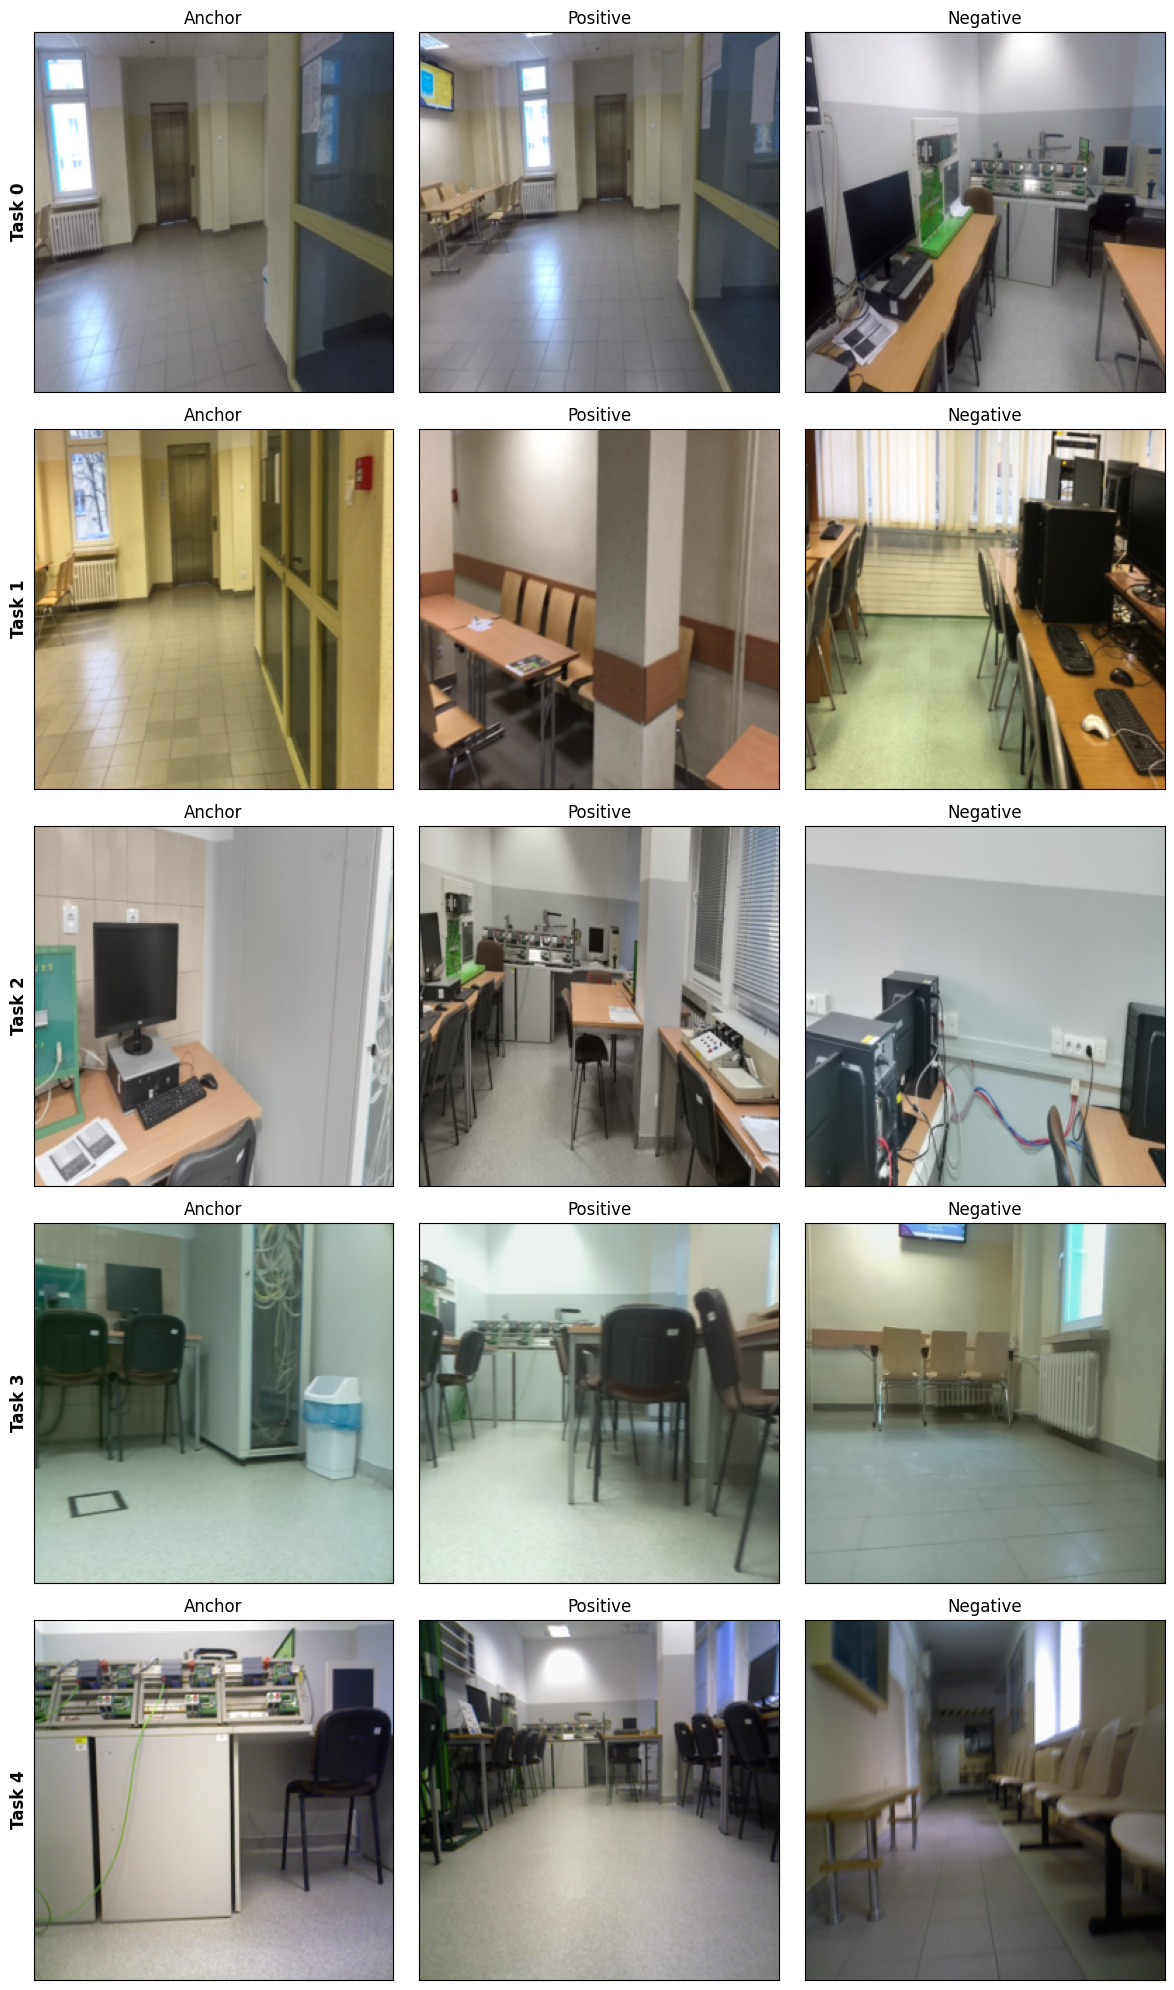

In [23]:
import matplotlib.pyplot as plt
import random

stream = rtv_camera_domain_benchmark.train_datasets_stream
n_tasks = len(stream)
fig, axes = plt.subplots(n_tasks, 3, figsize=(12, 4 * n_tasks))

for i, exp in enumerate(stream):
    dataset = exp.dataset
    idx = random.randint(0, len(dataset) - 1)
    
    triplet, _ = dataset[idx]
    titles = ["Anchor", "Positive", "Negative"]
    
    for j in range(3):
        img = triplet[j]
        if hasattr(img, 'permute'):
            img = img.permute(1, 2, 0)
        
        ax = axes[i, j] if n_tasks > 1 else axes[j]
        
        ax.imshow(img)
        if j == 0:
            ax.set_ylabel(f"Task {i}", fontsize=12, fontweight='bold')
        ax.set_title(titles[j])
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

plt.tight_layout()
plt.show()